# Machine Learning - Polynomial Regressions 

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import operator

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [96]:
# Read the data from AWS/Google Cloud
full_data = pd.read_csv('data/final_crime.csv')
data_14 = pd.read_csv('data/2014_crime.csv')
data_15 = pd.read_csv('data/2015_crime.csv')
data_16 = pd.read_csv('data/2016_crime.csv')
data_17 = pd.read_csv('data/2017_crime.csv')
data_18 = pd.read_csv('data/2018_crime.csv')
data_19 = pd.read_csv('data/2019_crime.csv')
data_20 = pd.read_csv('data/2020_crime.csv')
data_20.head()

C:\Users\smm11\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Report_No,Reported_Date,IBRS,Race,Sex,Age
0,0,KC20000075,1/1/2020,13A,W,F,22.0
1,1,KC20000125,1/1/2020,120,B,M,18.0
2,2,KC20000158,1/1/2020,13A,B,M,NaN
3,3,KC20000242,1/1/2020,120,B,M,NaN
4,4,KC20000268,1/2/2020,NaN,W,F,67.0


## Total Crime Polynomial Regression

In [97]:
# Count and store number of reports per year based on rows in CSV files
index14=data_14["Report_No"]
amount14=len(index14)

index15=data_15["Report_No"]
amount15=len(index15)

index16=data_16["Report_No"]
amount16=len(index16)

index17=data_17["Report_No"]
amount17=len(index17)

index18=data_18["Report_No"]
amount18=len(index18)

index19=data_19["Report_No"]
amount19=len(index19)

# Add 25% to 2020 in order to accomodate for the remaining three months of the year
index20=data_20["Report_No"]
amount2=len(index20)
amount20=amount2*1.25

# Store all amounts in a single list
yearly_crime_df = pd.DataFrame({'year': [2014,2015,2016,2017,2018,2019,2020], 
                                'crime_total': [amount14, amount15, amount16, amount17, amount18, amount19, amount20]})

yearly_crime_df.head(7)

,year,crime_total
0,2014,124832.0
1,2015,121901.0
2,2016,127877.0
3,2017,132139.0
4,2018,128938.0
5,2019,78046.0
6,2020,89597.5


In [98]:
# Assign X and Y
xc = yearly_crime_df['year'].values.reshape(-1, 1)
yc = yearly_crime_df['crime_total'].values.reshape(-1, 1)
print(xc.shape, yc.shape)

(7, 1) (7, 1)


In [100]:
xc_train, xc_test, yc_train, yc_test = train_test_split(xc, yc, test_size=0.2, random_state=10)

In [101]:
crimePolynomial_features= PolynomialFeatures(degree=2)
xc_poly = crimePolynomial_features.fit_transform(xc)

In [102]:
# Create a LinearRegression model and fit it to the scaled training data
crime_model = LinearRegression()
crime_model.fit(xc_poly, yc)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

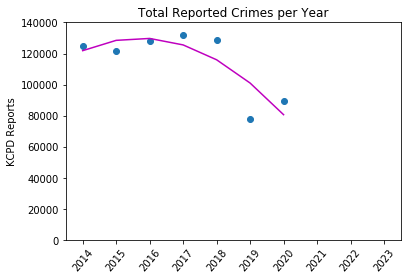

In [103]:
labels=[2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]
plt.scatter(xc, yc)

# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(xc,yc_poly_pred), key=sort_axis)
xc, yc_poly_pred = zip(*sorted_zip)
plt.plot(xc, yc_poly_pred, color='m')
plt.ylim(0,140000)
plt.xlim(2013.5,2023.5)
plt.xticks(labels, rotation =50) 
plt.title('Total Reported Crimes per Year')
plt.ylabel('KCPD Reports')
plt.show()

In [ ]:
# Calculate MSE and R2
crime_RMSE = np.sqrt(mean_squared_error(yc, yc_poly_pred))
crime_r2 = r2_score(yc, yc_poly_pred)

print(f"RMSE: {crime_RMSE}, R2: {crime_r2}")

In [112]:
pred21=crime_model.predict(crimePolynomial_features.fit_transform([[2021]]))
pred22=crime_model.predict(crimePolynomial_features.fit_transform([[2022]]))
pred23=crime_model.predict(crimePolynomial_features.fit_transform([[2023]]))

[[-12877.27386475]]


## Total Homicides Polynomial Regression

In [116]:
ibrs2014 = data_14[(data_14["IBRS"] =="09A") | (data_14["IBRS"] =="09B")]
ibrs14=ibrs2014["IBRS"]
murders14=len(ibrs14)

ibrs2015 = data_15[(data_15["IBRS"] =="09A") | (data_15["IBRS"] =="09B")]
ibrs15=ibrs2015["IBRS"]
murders15=len(ibrs15)

ibrs2016 = data_16[(data_16["IBRS"] =="09A") | (data_16["IBRS"] =="09B")]
ibrs16=ibrs2016["IBRS"]
murders16=len(ibrs16)

ibrs2017 = data_17[(data_17["IBRS"] =="09A") | (data_17["IBRS"] =="09B")]
ibrs17=ibrs2017["IBRS"]
murders17=len(ibrs17)

ibrs2018 = data_18[(data_18["IBRS"] =="09A") | (data_18["IBRS"] =="09B")]
ibrs18=ibrs2018["IBRS"]
murders18=len(ibrs18)

ibrs2019 = data_19[(data_19["IBRS"] =="09A") | (data_19["IBRS"] =="09B")]
ibrs19=ibrs2019["IBRS"]
murders19=len(ibrs19)

ibrs2020 = data_20[(data_20["IBRS"] =="09A") | (data_20["IBRS"] =="09B")]
ibrs20=ibrs2020["IBRS"]
murders20=len(ibrs20)

# Store all amounts in a single list
yearly_murder_df = pd.DataFrame({'year': [2014,2015,2016,2017,2018,2019,2020], 
                                'murder_total': [murders14, murders15, murders16, murders17, murders18, murders19, murders20]})

yearly_murder_df.head(7)

,year,murder_total
0,2014,155
1,2015,205
2,2016,251
3,2017,267
4,2018,299
5,2019,264
6,2020,377


In [117]:
# Assign X and Y
xm = yearly_murder_df['year'].values.reshape(-1, 1)
ym = yearly_murder_df['murder_total'].values.reshape(-1, 1)
print(xm.shape, ym.shape)

(7, 1) (7, 1)


In [118]:
murderPolynomial_features= PolynomialFeatures(degree=2)
xm_poly = polynomial_features.fit_transform(xm)

In [119]:
# Create a LinearRegression model and fit it to the scaled training data
murder_model = LinearRegression()
murder_model.fit(xm_poly, ym)
ym_poly_pred=murder_model.predict(xm_poly)

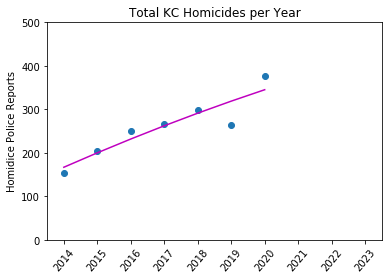

In [120]:
plt.scatter(xm, ym)

# sort the values of x before line plot
sort_murderAxis = operator.itemgetter(0)
sorted_murderZip = sorted(zip(xm,ym_poly_pred), key=sort_axis)
xm, ym_poly_pred = zip(*sorted_murderZip)
plt.plot(xm, ym_poly_pred, color='m')
plt.ylim(0,500)
plt.xlim(2013.5,2023.5)
plt.xticks(labels, rotation =50) 
plt.title('Total KC Homicides per Year')
plt.ylabel('Homidice Police Reports')

plt.show()

In [121]:
# Calculate MSE and R2
murder_RMSE = np.sqrt(mean_squared_error(ym, ym_poly_pred))
murder_r2 = r2_score(ym, ym_poly_pred)

print(f"RMSE: {murder_RMSE}, R2: {murder_r2}")

RMSE: 25.754598030667474, R2: 0.8421007458955985


In [122]:
mpred21=murder_model.predict(murderPolynomial_features.fit_transform([[2021]]))
mpred22=murder_model.predict(murderPolynomial_features.fit_transform([[2022]]))
mpred23=murder_model.predict(murderPolynomial_features.fit_transform([[2023]]))
print(mpred21)
print(mpred22)
print(mpred23)

[[370.28571428]]
[[393.78571428]]
[[415.90476191]]
